In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import math
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
soleado = pd.read_csv('Datos soleado cada 20 min')
nublado = pd.read_csv('Datos nublado cada 20 min')
p_nublado = pd.read_csv('Datos parcialmente nublado cada 20 min')
print('Tamaño soleado:',len(soleado))
print('Tamaño nublado:',len(nublado))
print('Tamaño parcialmente nublado:',len(p_nublado))


Tamaño soleado: 2370
Tamaño nublado: 3210
Tamaño parcialmente nublado: 8160


In [15]:
sum(soleado['Potencia [kW]'])

55798.20000000007

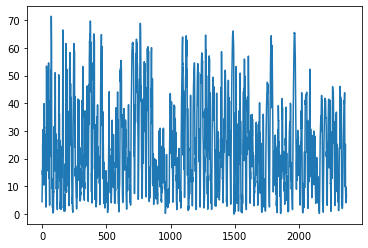

In [3]:
soleado['Potencia [kW]'].plot()

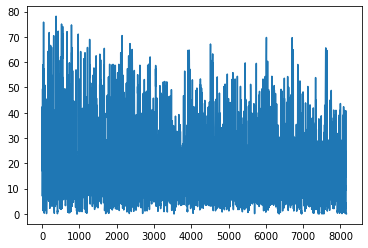

In [4]:
p_nublado['Potencia [kW]'].plot()

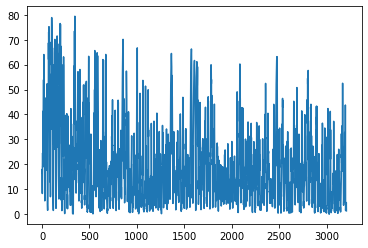

In [5]:
nublado['Potencia [kW]'].plot()

In [6]:
print('Energia media soleado:',soleado['Potencia [kW]'].values.mean())
print('Energia media p_nublad:',p_nublado['Potencia [kW]'].values.mean())
print('Energia media nublado:',nublado['Potencia [kW]'].values.mean())

Energia media soleado: 23.54354430379747
Energia media p_nublad: 20.651364583333333
Energia media nublado: 18.672496884735203


In [9]:
print('Desv potencia soleado:',soleado['Potencia [kW]'].values.std())
print('Desv potencia p_nublad:',p_nublado['Potencia [kW]'].values.std())
print('Desv potencia nublado:',nublado['Potencia [kW]'].values.std())

Desv potencia soleado: 16.499528820984338
Desv potencia p_nublad: 14.702425269519464
Desv potencia nublado: 15.89091218863493


### Funcion mape

In [15]:
#Mape = (1/N)* sumatoria(|(real-predicho)|/real)*100

def mape_funcion (real,pronostico,shift):
    real = real[shift:]
    pronostico = pronostico[shift:]
    N = len(real)
    #print(real[0])
    error = []
    for i in range(N):
        if real[i]== 0 :
            N=N-1
        else:
            error.append(np.abs(real[i]-pronostico[i])/real[i])

    return sum(error)/N*100,'%'

## Persistencia soleados

In [17]:
shift = 1
sol_real = soleado['Potencia [kW]']
sol_pron = sol_real.shift(shift)

In [43]:
rmse_sol = math.sqrt(mean_squared_error(sol_real[1:],sol_pron[1:]))
mae_sol = mean_absolute_error(sol_real[1:],sol_pron[1:])
corre = np.corrcoef(sol_real[1:],sol_pron[1:])

In [19]:
mape_sol = mape_funcion(sol_real.values,sol_pron.values,1)

In [44]:
print('El RMSE soleado es:',rmse_sol)
print('El MAE soleado es:',mae_sol)
print('El MAPE soleado es:',mape_sol)
corre

El RMSE soleado es: 8.002311321379347
El MAE soleado es: 5.599908189109328
El MAPE soleado es: (40.38503059245207, '%')


array([[1.        , 0.88237428],
       [0.88237428, 1.        ]])

## Persistencia parcialmente nublado

In [21]:
shift = 1
parcial_real = p_nublado['Potencia [kW]']
parcial_pron = parcial_real.shift(shift) 

In [45]:
rmse_parcial = math.sqrt(mean_squared_error(parcial_real[shift:],parcial_pron[shift:]))
mae_parcial   = mean_absolute_error(parcial_real[shift:],parcial_pron[shift:])
mape_parcial = mape_funcion(parcial_real.values,parcial_pron.values,shift)
corre = np.corrcoef(parcial_real[shift:],parcial_pron[shift:])

In [46]:
print('El RMSE soleado es:',rmse_parcial)
print('El MAE soleado es:',mae_parcial)
print('El MAPE soleado es:',mape_parcial)
'CORRE:',corre

El RMSE soleado es: 8.425783312733678
El MAE soleado es: 5.882558524328962
El MAPE soleado es: (45.46602252285754, '%')


('CORRE:',
 array([[1.       , 0.8357773],
        [0.8357773, 1.       ]]))

## Persistencia nublado

In [24]:
shift = 1
nublado_real = nublado['Potencia [kW]']
nublado_pron = nublado_real.shift(shift) 

In [47]:
rmse_nublado = math.sqrt(mean_squared_error(nublado_real[shift:],nublado_pron[shift:]))
mae_nublado   = mean_absolute_error(nublado_real[shift:],nublado_pron[shift:])
mape_nublado = mape_funcion(nublado_real.values,nublado_pron.values,shift)
corre_train = np.corrcoef(nublado_real[shift:],nublado_pron[shift:])

In [48]:
print('El RMSE soleado es:',rmse_nublado)
print('El MAE soleado es:',mae_nublado)
print('El MAPE soleado es:',mape_nublado)
corre_train

El RMSE soleado es: 8.186485857278125
El MAE soleado es: 5.431708476160798
El MAPE soleado es: (48.2867493888845, '%')


array([[1.        , 0.86731713],
       [0.86731713, 1.        ]])

## Persistencia total

In [32]:
datos = pd.read_csv('Datos cada 20 min.csv')
datos = datos.set_index(np.array(range(len(datos))))
datos

,Unnamed: 0,Fecha,Potencia [kW],Irradiacion [W/m2],Temperatura de modulos[C]
0,0,1/10/2019,7.2675,94.1550,15.9850
1,1,1/10/2019,21.4250,352.3375,24.5925
2,2,1/10/2019,16.9675,282.3600,28.8400
3,3,1/10/2019,36.2925,557.1875,32.0300
4,4,1/10/2019,35.2000,515.4425,34.4150
...,...,...,...,...,...
13735,13735,31/12/2020,0.1250,9.6825,13.2375
13736,13736,31/12/2020,0.4650,19.0200,13.8800
13737,13737,31/12/2020,0.2750,14.4550,13.7500
13738,13738,31/12/2020,0.2300,12.2600,14.1250


In [33]:
total_real = datos['Potencia [kW]']
total_pron = total_real.shift()

In [34]:
rmse_total = math.sqrt(mean_squared_error(total_real[shift:],total_pron[shift:]))
mae_total   = mean_absolute_error(total_real[shift:],total_pron[shift:])
mape_total = mape_funcion(total_real.values,total_pron.values,shift)

In [35]:
print('El RMSE total es:',rmse_total)
print('El MAE total es:',mae_total)
print('El MAPE total es:',mape_total)

El RMSE total es: 8.301423713676694
El MAE total es: 5.73281679889366
El MAPE total es: (45.62437923205752, '%')
